# <center>  Spread Visualization and Prediction of the Novel Coronavirus Disease COVID-19 Using Machine Learning </center>
#### <center> by [Zahra Taheri](https://github.com/zata213/) - July 2020 </center>
 
<center> <img  src=https://wineamerica.org/wp-content/uploads/2020/03/Covid-19-Atlantic.jpeg width="400"/></center>
    
<center>image source: https://wineamerica.org/wp-content/uploads/2020/03/Covid-19-Atlantic.jpeg</center>
 

 <br>
 
The current destructive pandemic of coronavirus disease 2019 (COVID-19), caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) [[1]](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/technical-guidance/naming-the-coronavirus-disease-(covid-2019)-and-the-virus-that-causes-it), was first reported in Wuhan, China, in December 2019 [[2]](https://www.who.int/csr/don/12-january-2020-novel-coronavirus-china/en/). The outbreak has affected millions of people around the world and the number of infections and mortalities has been growing at an alarming rate. In such a situation, forecasting and proper study of the pattern of disease spread can inspire design better strategies to make more efficient decisions. Moreover, such studies play an important role in achieving accurate predictions. 

Machine learning has numerous tools  that can be used for visualization and prediction, and nowadays it is used worldwide for study of the pattern of COVID-19 spread. One of the main focus of the study in this project is to use machine learning techniques to analyze and visualize the spreading of the virus country-wise as well as globally during a specific period of time by considering confirmed cases, recovered cases and fatalities.

The global impact of the outbreak on various aspects of life has been the focus of many studies, e.g., see \cite{Walker,Alon,Ho,Fernandes}. On the other hand, a pandemic can be forecast by considering a variety of parameters such as the impact of environmental factors, quarantine, age, gender and a lot more. 

The forecasting accuracy depends on the availability of proper data to base its predictions and provide an estimate of uncertainty. A challenge to use machine learning techniques for the current outbreak is that the datasets are not yet standardized by any standardization organization and the statistical anomalies are not considered. Also, the appropriate selection of parameters and the selection of the best machine learning model for prediction are other challenges involved in training a model. In this project, we are going to employ some appropriate machine learning algorithms and time series analysis to predict the infection and mortality rates of the COVID-19 pandemic in Iran and some other countries. Moreover, we are going to study the impact of some parameters such as geographic conditions, economic statistics, population statistics, life expectancy, etc., in prediction of COVID-19 spread.
<br>

- Data source: [Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19)
- More information: [World Health Organization (WHO)](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)
<br>

**Last update of the notebook: "07-20-2020"**

## Some installations to show plotly in the Jupyter lab

In [2]:
#%pip install nodejs

#%pip install jupyterlab "ipywidgets>=7.5"

#%pip install npm

# JupyterLab renderer support
#!jupyter labextension install jupyterlab-plotly@4.8.2

In [3]:
# define a function to display plotly in notebook without above installations

#def configure_plotly_browser_state():
#  import IPython
#  display(IPython.core.display.HTML('''
#        <script src="/static/components/requirejs/require.js"></script>
#        <script>
#          requirejs.config({
#            paths: {
#              base: '/static/base',
#              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
#            },
#          });
#        </script>
#        '''))


# paste the following line at the begining of the cell containing plotly

#configure_plotly_browser_state()

## Some other installations

In [4]:
#%pip install statsmodels

#%pip install pystan

#%pip install fbprophet

## Import some libraries

In [5]:
# for dataset handeling and calculations
import numpy as np 
import pandas as pd 

# for basic visualizations
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
%matplotlib inline 

# for advanced visualizations
import seaborn as sns

# for interactive visualizations
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# for offline ploting 
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# to hide warnings
import warnings
warnings.filterwarnings('ignore')

# for date and time operations
from datetime import datetime,timedelta

# for file and folder operations
import os

# for modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.tsa.arima_model import ARIMA
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly, add_changepoints_to_plot

## Path to the files directory

In [6]:
path = os.getcwd()

if os.path.exists(path+"\data")==False:
    print("Make file directory!")
    os.mkdir(path+"\data")

mypath = path+"\data"

In [7]:
# path to the directory
 
os.chdir(mypath)

print(os.getcwd())

C:\Users\Zahra\project-covid\data


## Read datasets

In [8]:
# read files from hard drive

#confirmed_df = pd.read_csv('confirmed_df.csv')
#recovered_df=pd.read_csv('recovered_df.csv')
#deaths_df=pd.read_csv('deaths_df.csv')

In [9]:
# remove all '*.csv' files in the current directory
import glob
for file in glob.glob("*.csv"):
    os.remove(file)

# read files from url
download_root='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_df = pd.read_csv(download_root+"time_series_covid19_confirmed_global.csv")
recovered_df=pd.read_csv(download_root+"time_series_covid19_recovered_global.csv")
deaths_df=pd.read_csv(download_root+"time_series_covid19_deaths_global.csv")

# save datasets as '*.csv' file 
confirmed_df.to_csv('confirmed_df.csv', index=False)
recovered_df.to_csv('recovered_df.csv', index=False)
deaths_df.to_csv('deaths_df.csv', index=False)

In [10]:
confirmed_df.head(3)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/9/20  7/10/20  7/11/20  7/12/20  \
0        0        0        0        0  ...   33908    34194    34366    34451   
1        0        0        0        0  ...    3188     3278     3371     3454   
2        0        0        0        0  ...   17808    18242    18712    19195   

   7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  
0    34455    34740    34994    35070    35229    35301  
1     3571     3667     3752     3851     3906     4008  
2    19689    20216    20770    21355    21948    22549  

[3 rows x 183 columns]

In [11]:
deaths_df.head(3)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/9/20  7/10/20  7/11/20  7/12/20  \
0        0        0        0        0  ...     957      971      994     1010   
1        0        0        0        0  ...      83       85       89       93   
2        0        0        0        0  ...     988      996     1004     1011   

   7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  
0     1012     1048     1094     1113     1147     1164  
1       95       97      101      104      107      111  
2     1018     1028     1040     1052     1057     1068  

[3 rows x 183 columns]

In [12]:
recovered_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/9/20  7/10/20  7/11/20  7/12/20  \
0        0        0        0        0  ...   20847    20882    21135    21216   
1        0        0        0        0  ...    1832     1875     1881     1946   
2        0        0        0        0  ...   12637    13124    13124    13743   
3        0        0        0        0  ...     802      803      803      803   
4        0        0        0        0  ...     117      117      118      118   

   7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  
0    21254    21454    22456    22824    23151    23273  
1     2014     2062     2091     2137     2214     2264  
2    14019    14295    14792    15107    15430    15744  
3      803      803      803      803      803      803  
4      118      118      124      124      199      210  

[5 rows x 183 columns]

## Make a full dataframe by merging three latter ones

In [13]:
# melt dataframes to go from wide to long
def melt_df(df,name):
    melted = pd.melt(df,id_vars=['Province/State','Country/Region','Lat','Long'],
                        value_vars=confirmed_df.columns[4:],
                        var_name='Date',value_name=name)
    return melted

melt_confirmed = melt_df(confirmed_df,'Confirmed')
melt_deaths = melt_df(deaths_df,'Deaths')
melt_recovered = melt_df(recovered_df,'Recovered')

#print(melt_confirmed.shape)
#print(melt_deaths.shape)
#print(melt_recovered.shape)
print(melt_confirmed.head())

# merge dataframes
def merge(df1,df2):
    merged = pd.merge(left=df1,right=df2, how='left',
                      on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])
    return merged

main_df = merge(merge(melt_confirmed,melt_deaths),melt_recovered)

print(main_df.shape)
main_df.head()

  Province/State Country/Region       Lat       Long     Date  Confirmed
0            NaN    Afghanistan  33.93911  67.709953  1/22/20          0
1            NaN        Albania  41.15330  20.168300  1/22/20          0
2            NaN        Algeria  28.03390   1.659600  1/22/20          0
3            NaN        Andorra  42.50630   1.521800  1/22/20          0
4            NaN         Angola -11.20270  17.873900  1/22/20          0
(47614, 8)


Province/State Country/Region       Lat       Long     Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  1/22/20          0   
1            NaN        Albania  41.15330  20.168300  1/22/20          0   
2            NaN        Algeria  28.03390   1.659600  1/22/20          0   
3            NaN        Andorra  42.50630   1.521800  1/22/20          0   
4            NaN         Angola -11.20270  17.873900  1/22/20          0   

   Deaths  Recovered  
0       0        0.0  
1       0        0.0  
2       0        0.0  
3       0        0.0  
4       0        0.0

In [14]:
main_df.to_csv('covid19_full_uncleaned.csv', index=False)

## Preparation of the dataset

In [15]:
# Percentage of missing data in each column

number_of_columns = main_df.shape[0]
percentage_of_missing_data = main_df.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

Province/State    0.695489
Country/Region    0.000000
Lat               0.000000
Long              0.000000
Date              0.000000
Confirmed         0.000000
Deaths            0.000000
Recovered         0.093985
dtype: float64


In [16]:
# fill missing values of 'Recovered' with 0
main_df['Recovered'] = main_df['Recovered'].fillna(0)

# fill missing values of 'province/state' with ''
main_df['Province/State'] = main_df['Province/State'].fillna('')

# convert values of 'Recovered' to int datatype
main_df['Recovered'] = main_df['Recovered'].astype('int')

# change names of some countries
main_df['Country/Region'] = main_df['Country/Region'].replace('Korea, South', "South Korea")
main_df['Country/Region'] = main_df['Country/Region'].replace('Mainland China', 'China')
main_df['Country/Region'] = main_df['Country/Region'].replace('Taiwan*', 'Taiwan')
main_df['Country/Region'] = main_df['Country/Region'].replace('Congo (Kinshasa)', 'Democratic Republic of the Congo')
main_df['Country/Region'] = main_df['Country/Region'].replace('Congo (Brazzaville)', 'Republic of the Congo')
main_df.loc[main_df['Province/State']=='Greenland', 'Country/Region'] = 'Greenland'

# define new feature for main_df
main_df['Active'] = main_df['Confirmed'] - main_df['Deaths'] - main_df['Recovered']

main_df.tail()

Province/State         Country/Region        Lat       Long     Date  \
47609                 Sao Tome and Principe   0.186400   6.613100  7/18/20   
47610                                 Yemen  15.552727  48.516388  7/18/20   
47611                               Comoros -11.645500  43.333300  7/18/20   
47612                            Tajikistan  38.861000  71.276100  7/18/20   
47613                               Lesotho -29.610000  28.233600  7/18/20   

       Confirmed  Deaths  Recovered  Active  
47609        743      14        337     392  
47610       1581     443        701     437  
47611        328       7        311      10  
47612       6834      57       5529    1248  
47613        359       6         69     284

In [17]:
print(main_df['Date'].describe(),'\n')

# convert dates to proper date format for better visualization
#.dt.normalize() is just to change display from 2020-04-09 00:00:00 to 2020-04-09

main_df['Date'] = pd.to_datetime(main_df['Date']).dt.normalize()

print(main_df['Date'].describe())
main_df['Date']

count      47614
unique       179
top       2/3/20
freq         266
Name: Date, dtype: object 

count                   47614
unique                    179
top       2020-04-09 00:00:00
freq                      266
first     2020-01-22 00:00:00
last      2020-07-18 00:00:00
Name: Date, dtype: object


0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
47609   2020-07-18
47610   2020-07-18
47611   2020-07-18
47612   2020-07-18
47613   2020-07-18
Name: Date, Length: 47614, dtype: datetime64[ns]

### Web scraping to get [WHO regions related to country names](https://www.who.int/choice/demography/by_country/en/)

- African Region (AFRO)
- Region of the Americas (PAHO)
- South-East Asia Region (SEARO)
- European Region (EURO)
- Eastern Mediterranean Region (EMRO)
- Western Pacific Region (WPRO)

In [18]:
# remove rows in which 'Country/Region' is a ship name

main_df = main_df[main_df['Country/Region'].str.contains('Diamond Princess')!=True]
main_df = main_df[main_df['Country/Region'].str.contains('MS Zaandam')!=True]

In [19]:
# required installations

#%pip install lxml html5lib beautifulsoup4

In [20]:
# Webpage url                                                                                                               
url = 'https://www.who.int/choice/demography/by_country/en/'

# Extract tables
dfs = pd.read_html(url)

# Get first table                                                                                                           
df = dfs[0]

# Extract columns                                                                                                           
df2 = df[['Country','Region Name']]
print(df2)

# Write to excel
df2.to_csv('WHO_regions.csv', index=False)

WHO_regions=pd.read_csv('WHO_regions.csv')

         Country Region Name
0              A         NaN
1    Afghanistan        EMRO
2        Albania        EURO
3        Algeria        AFRO
4        Andorra        EURO
..           ...         ...
213            Y         NaN
214        Yemen        EMRO
215            Z         NaN
216       Zambia        AFRO
217     Zimbabwe        AFRO

[218 rows x 2 columns]


#### Add 'WHO region' column

In [21]:
# WHO_regions dataframe to dictionary
new_who=WHO_regions.copy()
new_who=new_who.set_index('Country').T.to_dict('list')

# add 'WHO region' column
for k, v in new_who.items():
    main_df.loc[(main_df['Country/Region'] == k), 'WHO region'] = v[0]
    
# find missing values
print(main_df[main_df['WHO region'].isna()]['Country/Region'].unique().tolist())

['Antigua and Barbuda', 'Brunei', 'Cabo Verde', 'Republic of the Congo', "Cote d'Ivoire", 'Czechia', 'Greenland', 'Eswatini', 'Holy See', 'Iran', 'South Korea', 'Liechtenstein', 'Moldova', 'North Macedonia', 'Russia', 'Taiwan', 'Tanzania', 'US', 'Vietnam', 'Syria', 'Laos', 'West Bank and Gaza', 'Kosovo', 'Burma', 'Western Sahara', 'Sao Tome and Principe']


In [22]:
# fill missing values of WHO region

who_exceptions={'Antigua and Barbuda':'PAHO', 'Brunei':'WPRO', 'Cabo Verde':'AFRO', 'Republic of the Congo':'AFRO',
 "Cote d'Ivoire":'AFRO', 'Czechia':'EURO', 'Greenland':'EURO', 'Eswatini':'AFRO', 'Holy See':'EURO', 'Iran':'EMRO',
 'South Korea':'WPRO', 'Liechtenstein':'EURO', 'Moldova':'EURO', 'North Macedonia':'EURO', 'Russia':'EURO',
 'Taiwan':'WPRO', 'Tanzania':'AFRO', 'US':'PAHO', 'Vietnam':'WPRO', 'Syria':'EMRO', 'Laos':'WPRO', 
'West Bank and Gaza':'EMRO', 'Kosovo':'EURO', 'Burma':'SEARO', 'Western Sahara':'AFRO', 'Sao Tome and Principe':'AFRO'}

for k, v in who_exceptions.items():
    main_df.loc[(main_df['Country/Region'] == k), 'WHO region'] = v

# find missing values
print(main_df[main_df['WHO region'].isna()]['Country/Region'].unique())

[]


In [23]:
main_df.head()

Province/State Country/Region       Lat       Long       Date  Confirmed  \
0                   Afghanistan  33.93911  67.709953 2020-01-22          0   
1                       Albania  41.15330  20.168300 2020-01-22          0   
2                       Algeria  28.03390   1.659600 2020-01-22          0   
3                       Andorra  42.50630   1.521800 2020-01-22          0   
4                        Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active WHO region  
0       0          0       0       EMRO  
1       0          0       0       EURO  
2       0          0       0       AFRO  
3       0          0       0       EURO  
4       0          0       0       AFRO

### Save main_df to csv

In [24]:
main_df.to_csv('covid19_full_cleaned.csv', index=False)

In [25]:
#main_df=pd.read_csv('covid19_full_cleaned.csv') 

### Group covid19_full_cleaned dataframe by 'Date' and 'Country/Region'

In [26]:
covid19_date_country = main_df.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()\
                                .reset_index()

# add new columns containing new confirmed, new deaths and new recovered for each day
new_col = covid19_date_country.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum()\
                                    .diff().reset_index()
# rename some columns of new_col
new_col.columns = ['Country/Region', 'Date', 'New confirmed', 'New deaths', 'New recovered']
columns = ['New confirmed', 'New deaths', 'New recovered']

# fix the value of first row of each country
first_rows = (new_col['Country/Region'] != new_col['Country/Region'].shift(1))
new_col.loc[first_rows, 'New confirmed'] = 0
new_col.loc[first_rows, 'New deaths'] = 0
new_col.loc[first_rows, 'New recovered'] = 0

# merging new values
covid19_date_country = pd.merge(covid19_date_country, new_col, on=['Country/Region', 'Date'])

# fill missing values with 0
covid19_date_country = covid19_date_country.fillna(0)

covid19_date_country['New confirmed'] = covid19_date_country['New confirmed'].apply(lambda x: 0 if x<0 else x)

# fix datatypes of new columns
covid19_date_country[columns] = covid19_date_country[columns].astype('int')

# add 'WHO region' column
for k, v in new_who.items():
    covid19_date_country.loc[(covid19_date_country['Country/Region'] == k), 'WHO region'] = v[0]
    
for k, v in who_exceptions.items():
    covid19_date_country.loc[(covid19_date_country['Country/Region'] == k), 'WHO region'] = v

# find missing values
print(covid19_date_country[covid19_date_country['WHO region'].isna()]['Country/Region'].unique())

[]


In [27]:
covid19_date_country.tail()

Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
33468 2020-07-18  West Bank and Gaza       8204      59       1596    6549   
33469 2020-07-18      Western Sahara         10       1          8       1   
33470 2020-07-18               Yemen       1581     443        701     437   
33471 2020-07-18              Zambia       2980     120       1462    1398   
33472 2020-07-18            Zimbabwe       1478      25        439    1014   

       New confirmed  New deaths  New recovered WHO region  
33468            440           6            104       EMRO  
33469              0           0              0       AFRO  
33470              5           3              6       EMRO  
33471            170          11             12       AFRO  
33472             58           1              1       AFRO

In [28]:
# save as .csv file
covid19_date_country.to_csv('covid19_date_country.csv', index=False)

# save iran_df.csv file
iran_df=covid19_date_country[covid19_date_country['Country/Region'] == 'Iran']
iran_df.to_csv('covid19_iran.csv',index=False)

In [29]:
#covid19_date_country.to_csv('covid19_date_country.csv', index=False)

### Dataframe with the latest values of 'Country/Region'

In [30]:
# get the latest values related to each country
covid19_country_latest = covid19_date_country[covid19_date_country['Date']==max(covid19_date_country['Date'])].reset_index(drop=True)\
                    .drop('Date', axis=1)

print(covid19_country_latest.shape)
print(covid19_country_latest['Country/Region'].unique().shape)

# drop 'WHO region' column
covid19_country_latest = covid19_country_latest.drop('WHO region', axis=1)

# mortality and recovery rates
covid19_country_latest['Recovery rate(per 100)'] = \
                np.round(100*covid19_country_latest['Recovered']/covid19_country_latest['Confirmed'],2)
covid19_country_latest['Mortality rate(per 100)'] = \
                np.round(100*covid19_country_latest['Deaths']/covid19_country_latest['Confirmed'],2)

# fill missing values with 0
columns = ['Recovery rate(per 100)', 'Mortality rate(per 100)']
covid19_country_latest[columns] = covid19_country_latest[columns].fillna(0)

# add 'WHO region' column
for k, v in new_who.items():
    covid19_country_latest.loc[(covid19_country_latest['Country/Region'] == k), 'WHO region'] = v[0]
    
for k, v in who_exceptions.items():
    covid19_country_latest.loc[(covid19_country_latest['Country/Region'] == k), 'WHO region'] = v

# find missing values
print(covid19_country_latest[covid19_country_latest['WHO region'].isna()]['Country/Region'].unique())

covid19_country_latest.head()

(187, 9)
(187,)
[]


Country/Region  Confirmed  Deaths  Recovered  Active  New confirmed  \
0    Afghanistan      35301    1164      23273   10864             72   
1        Albania       4008     111       2264    1633            102   
2        Algeria      22549    1068      15744    5737            601   
3        Andorra        880      52        803      25              0   
4         Angola        687      29        210     448             49   

   New deaths  New recovered  Recovery rate(per 100)  Mortality rate(per 100)  \
0          17            122                   65.93                     3.30   
1           4             50                   56.49                     2.77   
2          11            314                   69.82                     4.74   
3           0              0                   91.25                     5.91   
4           0             11                   30.57                     4.22   

  WHO region  
0       EMRO  
1       EURO  
2       AFRO  
3       EURO  
4       AFRO

In [31]:
# save as .csv file
covid19_country_latest.to_csv('covid19_country_latest.csv', index=False)

### Group covid19_day_country dataframe by 'Date'

In [32]:
covid19_world = covid19_date_country.groupby('Date')['Confirmed', 'Deaths', 'Recovered','Active', 'New confirmed', 'New deaths',
                                                'New recovered'].sum().reset_index()

# mortality and recovery rates

covid19_world['Recovery rate(per 100)'] = \
                np.round(100*covid19_world['Recovered']/covid19_world['Confirmed'],2)
covid19_world['Mortality rate(per 100)'] = \
                np.round(100*covid19_world['Deaths']/covid19_world['Confirmed'],2)

# Number of countries having non-zero confirmed cases in each date
covid19_world['Number of countries'] = covid19_date_country[covid19_date_country['Confirmed']!=0].groupby('Date')['Country/Region']\
                                .unique().apply(len).values

# fill missing values with 0
columns = ['Recovery rate(per 100)', 'Mortality rate(per 100)']
covid19_world[columns] = covid19_world[columns].fillna(0)

covid19_world.head()

Date  Confirmed  Deaths  Recovered  Active  New confirmed  New deaths  \
0 2020-01-22        555      17         28     510              0           0   
1 2020-01-23        654      18         30     606             99           1   
2 2020-01-24        941      26         36     879            287           8   
3 2020-01-25       1434      42         39    1353            493          16   
4 2020-01-26       2118      56         52    2010            684          14   

   New recovered  Recovery rate(per 100)  Mortality rate(per 100)  \
0              0                    5.05                     3.06   
1              2                    4.59                     2.75   
2              6                    3.83                     2.76   
3              3                    2.72                     2.93   
4             13                    2.46                     2.64   

   Number of countries  
0                    6  
1                    8  
2                    9  
3                   11  
4                   13

In [33]:
# save as '*.csv' file
covid19_world.to_csv('covid19_world.csv', index=False)

## Visualizations

### The latest global status

In [34]:
covid19_world['Date'] = pd.to_datetime(covid19_world['Date'])

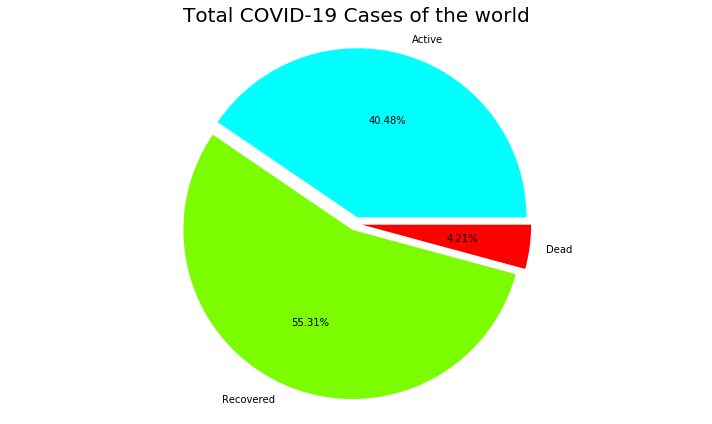

In [35]:
last_day = covid19_world.shape[0]-1
labels = ['Active','Recovered','Dead']
sizes = [covid19_world['Active'][last_day],covid19_world['Recovered'][last_day],covid19_world['Deaths'][last_day]]

plt.figure(figsize= (10,6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=0, explode =[0.04,0.04,0.04],
        colors = ['cyan','lawngreen','red'])
#centre_circle = plt.Circle((0,0),0.4,fc='white')

fig = plt.gcf()
#fig.gca().add_artist(centre_circle)
plt.title('Total COVID-19 Cases of the world',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [36]:
# total status of the COVID-19 Cases of the world

date_df2 = covid19_world[['Confirmed', 'Recovered', 'Deaths','Active','Recovery rate(per 100)',
                         'Mortality rate(per 100)','Number of countries']].tail(1)
date_df2.style.background_gradient(cmap='autumn_r',axis=1).format("{:.2f}").format("{:.2f}")

In [37]:
# get ISO 3 codes for countries to draw choropleth

import pycountry

df1 = pd.read_csv('covid19_date_country.csv')

list_countries = df1['Country/Region'].unique().tolist()
d_country_code = {}  # To hold the country names and their ISO 3 code
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)

# create a new column iso_alpha in df1
for k, v in d_country_code.items():
    df1.loc[(df1['Country/Region'] == k), 'iso_alpha'] = v

could not add ISO 3 code for -> Burma
could not add ISO 3 code for -> Democratic Republic of the Congo
could not add ISO 3 code for -> Laos
could not add ISO 3 code for -> South Korea
could not add ISO 3 code for -> West Bank and Gaza


In [38]:
fig = px.choropleth(data_frame = df1, 
                    locations= "iso_alpha",
                    color= "Confirmed",  # value in column 'Confirmed' determines color
                    hover_name= "Country/Region",
                    color_continuous_scale="Viridis_r",
                    animation_frame= "Date",
                    title='Global Spread of Coronavirus-Confirmed')
fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    margin=dict(
        l=1,
        r=1,
        b=100,
        t=100,
        pad=4
    ),
)
fig.show()

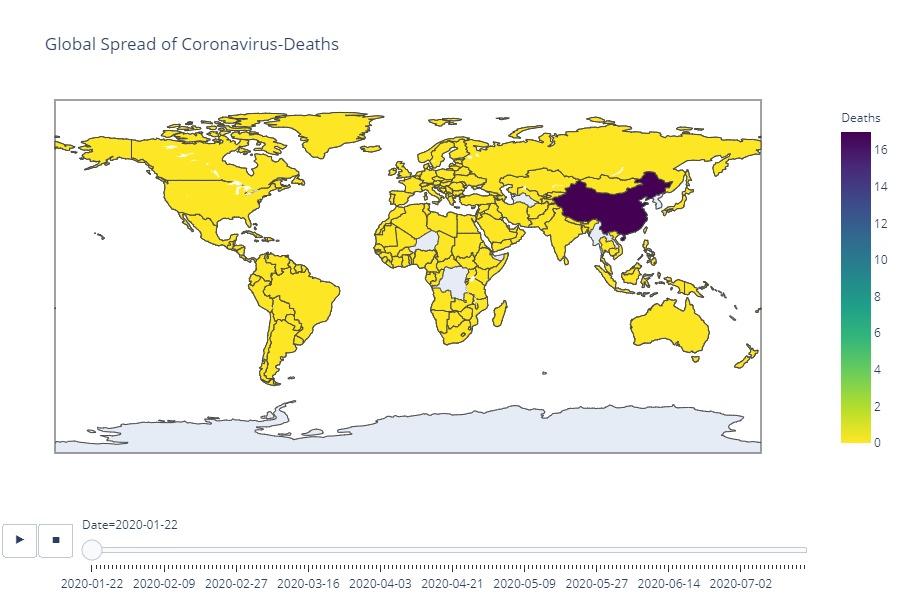

In [39]:
fig = px.choropleth(data_frame = df1, 
                    locations= "iso_alpha",
                    color= "Deaths",  # value in column '"Deaths' determines color
                    hover_name= "Country/Region",
                    color_continuous_scale="Viridis_r",
                    animation_frame= "Date",
                    title='Global Spread of Coronavirus-Deaths')
fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    margin=dict(
        l=1,
        r=1,
        b=100,
        t=100,
        pad=4
    ),
)
fig.show()

##  Confirmed, Active, Recovered and Death cases in 10 Most-affected Countries

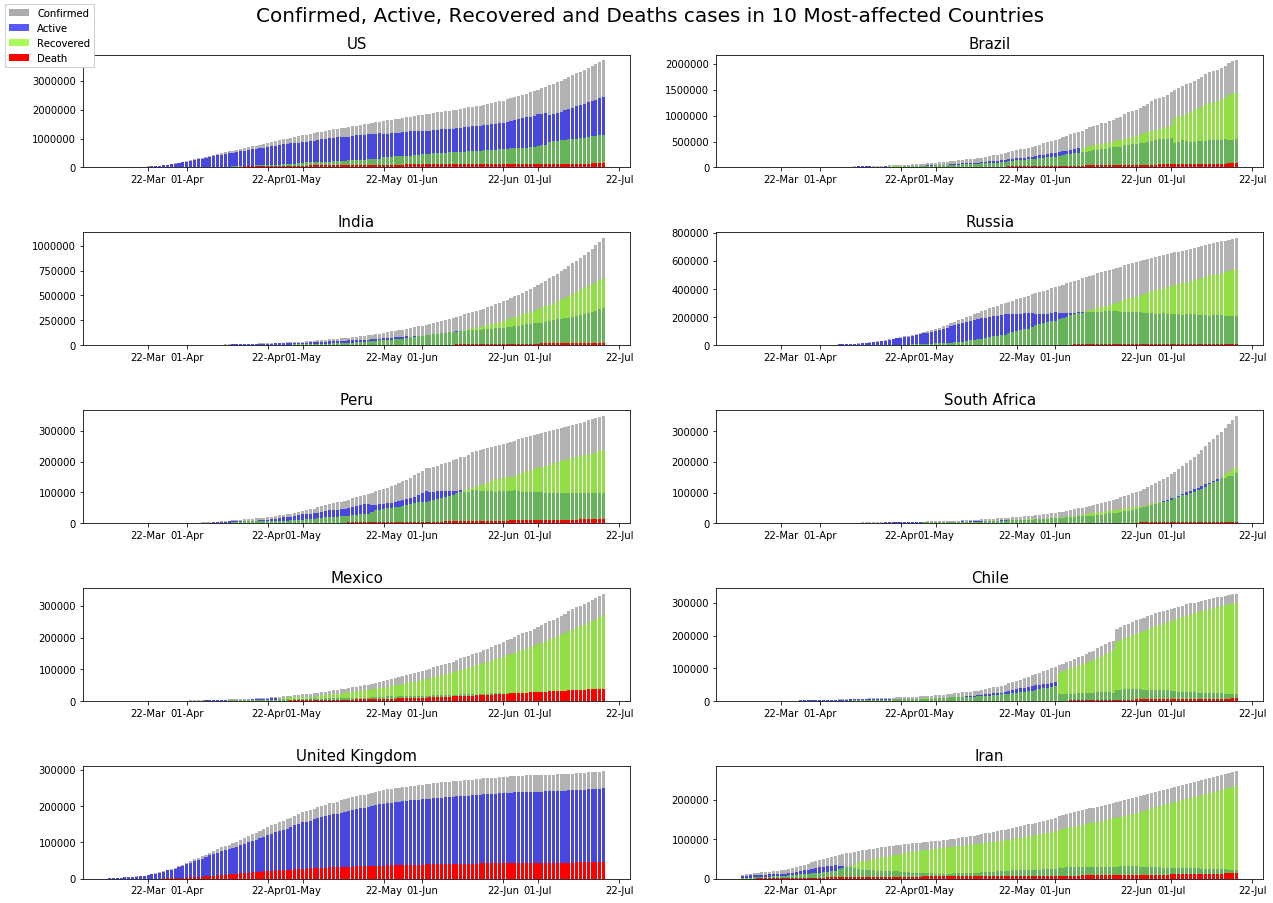

In [40]:
dates = covid19_world['Date'][50:]

# 10 most-affected countries to date 
most_affected=['US','Brazil','India','Russia','Peru','South Africa', 'Mexico','Chile', 'United Kingdom','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected[i]].iloc[50:,:]
    return df

fig = plt.figure(figsize= (18,15))
plt.suptitle('Confirmed, Active, Recovered and Deaths cases in 10 Most-affected Countries', fontsize = 20, y = 1.0)
k=0
for i in range(1,11):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(dates,country_df(k)['Confirmed'].values,color = 'grey',alpha = 0.6,label = 'Confirmed');
    ax.bar(dates,country_df(k)['Active'].values,color = 'blue',alpha = 0.6,label = 'Active');
    ax.bar(dates,country_df(k)['Recovered'].values,color='lawngreen',alpha = 0.6,label = 'Recovered');
    ax.bar(dates,country_df(k)['Deaths'].values,color='red',label = 'Death');   
    plt.title(most_affected[k], fontsize = 15)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

### Comparing Covid-19 case status of 10 most affected countries

In [41]:
def compare_plt(col):
    plt.figure(figsize= (20,10))
    plt.xticks(rotation = 60 ,fontsize = 11)
    plt.yticks(fontsize = 10)
    plt.xlabel("Dates",fontsize = 20)
    plt.ylabel('%s cases' % (col),fontsize = 20)
    plt.title("Covid-19 %s Cases of 10 Most Affected Countries" % (col), fontsize = 20)

    for i in range(len(most_affected)):
        plt.plot_date(y= country_df(i)[col].values,x= dates,label = most_affected[i],alpha=0.6,linestyle ='-')
    plt.legend();

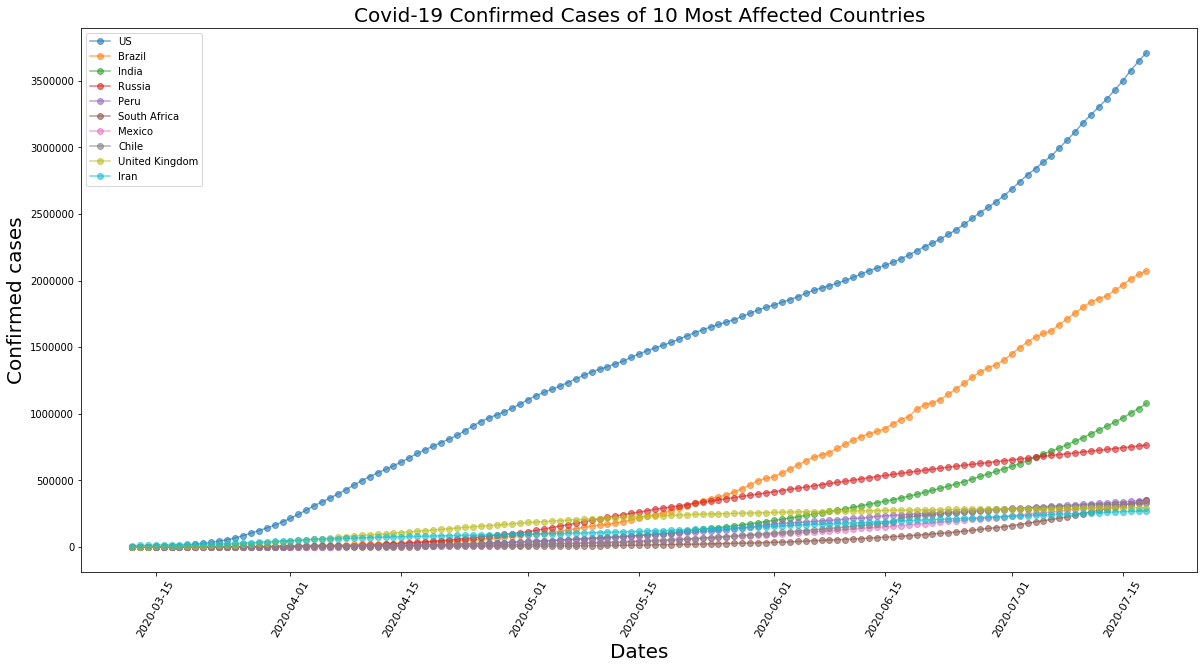

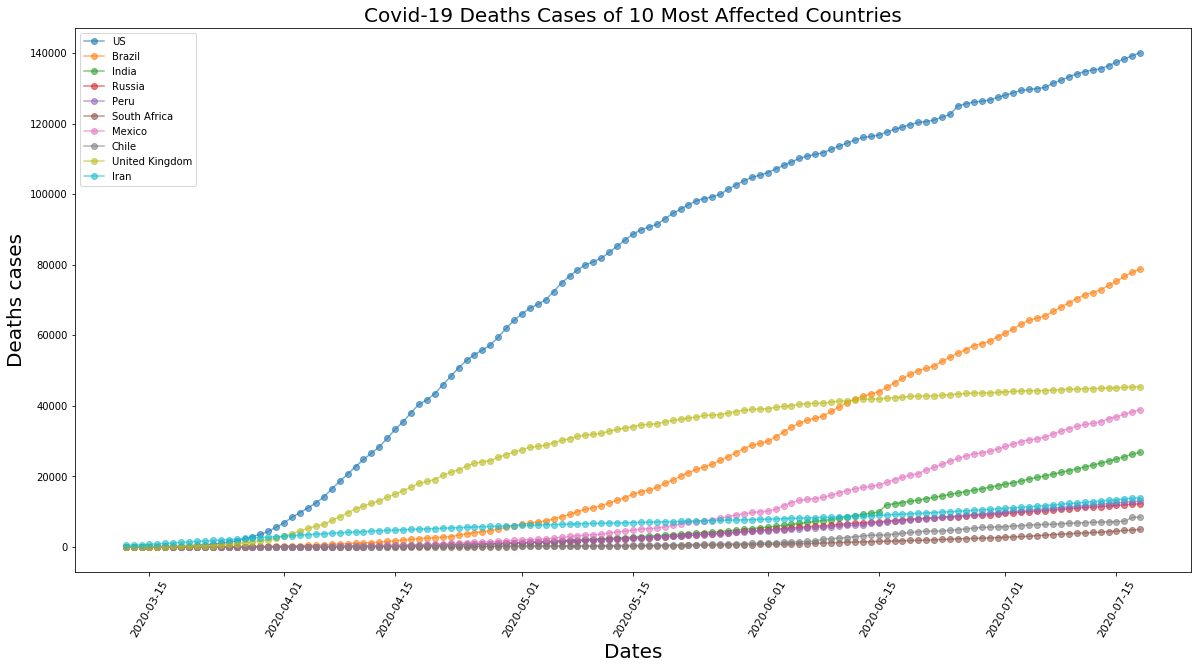

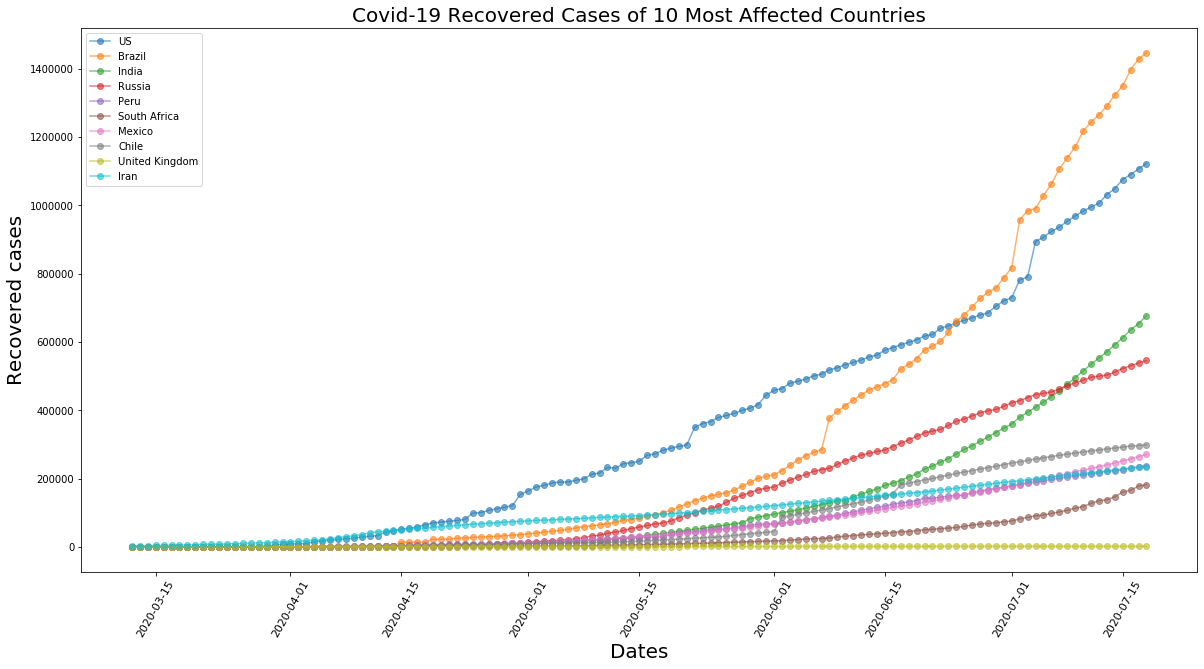

In [42]:
compare_plt('Confirmed')
compare_plt('Deaths')
compare_plt('Recovered')

### Confirmed, Recovered, Active and Death cases in Iran

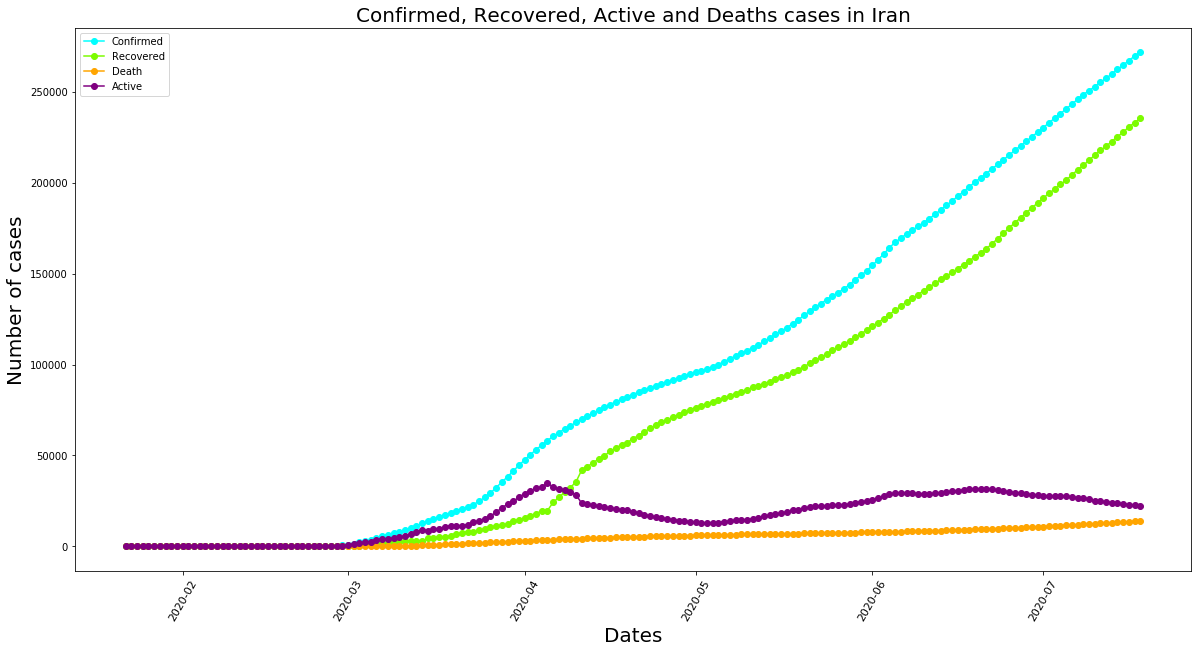

In [43]:
dates = covid19_world['Date'][:]

iran_df=covid19_date_country[covid19_date_country['Country/Region'] == 'Iran'].iloc[:,:] 

plt.figure(figsize= (20,10))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Number of cases',fontsize = 20)
plt.title("Confirmed, Recovered, Active and Deaths cases in Iran" , fontsize = 20)

ax1 = plt.plot_date(y= iran_df['Confirmed'].values,x= dates,label = 'Confirmed',linestyle ='-',color = 'cyan')
ax2 = plt.plot_date(y= iran_df['Recovered'].values,x= dates,label = 'Recovered',linestyle ='-',color = 'lawngreen')
ax3 = plt.plot_date(y= iran_df['Deaths'].values,x= dates,label = 'Death',linestyle ='-',color = 'orange')
ax4 = plt.plot_date(y= iran_df['Active'].values,x= dates,label = 'Active',linestyle ='-',color = 'purple')
plt.legend()

### Total COVID-19 confirmed, recovered, active and deaths cases (globally)

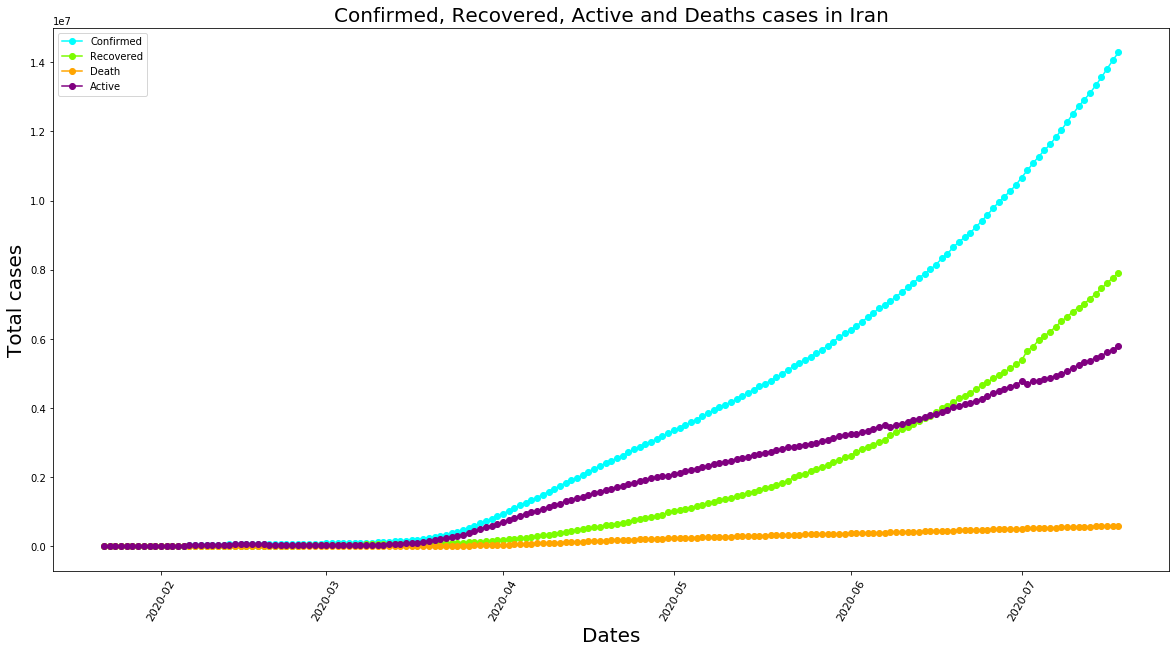

In [44]:
dates = covid19_world['Date'][:]

world_df=covid19_world.iloc[:,:] 

plt.figure(figsize= (20,10))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Confirmed, Recovered, Active and Deaths cases in Iran" , fontsize = 20)

ax1 = plt.plot_date(y= world_df['Confirmed'].values,x= dates,label = 'Confirmed',linestyle ='-',color = 'cyan')
ax2 = plt.plot_date(y= world_df['Recovered'].values,x= dates,label = 'Recovered',linestyle ='-',color = 'lawngreen')
ax3 = plt.plot_date(y= world_df['Deaths'].values,x= dates,label = 'Death',linestyle ='-',color = 'orange')
ax4 = plt.plot_date(y= world_df['Active'].values,x= dates,label = 'Active',linestyle ='-',color = 'purple')
plt.legend()

In [45]:
covid19_country_latest.copy().drop(['WHO region'],axis=1).sort_values('Confirmed',ascending=False)\
                    .reset_index(drop=True).iloc[:30,:].style.bar(align='left',width=80,color='gold')

## Data modelling and prediction

### Prediction of total confirmed cases of the world

In [46]:
# find numbers related to dates
numbers_of_dates = covid19_world.index.values.reshape(-1, 1)

# number of days in future considered to forecast
future_days = 10

# find numbers related to days from start to future
numbers_start_to_futures = np.array([i for i in range(covid19_world.shape[0]+future_days)]).reshape(-1, 1)

# first date in the dataset
first_date = covid19_world['Date'].tolist()[0]

# find dates related to days from start to future for better visualization
dates_start_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(len(numbers_start_to_futures))])
print(dates_start_to_futures.shape)

(189,)


In [47]:
#Splitting the dataset related to confirmed cases of the world into training and test sets

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(numbers_of_dates[50:],
                                                                                covid19_world['Confirmed'][50:].values,
                                                                                test_size = 0.2, shuffle=False)

print(X_train_confirmed.shape)
print(y_train_confirmed.shape)
print(X_test_confirmed.shape)
print(y_test_confirmed.shape)

(103, 1)
(103,)
(26, 1)
(26,)


#### Support vector machine regressor

RMSE of  SVR 109212.68
MSE of  SVR 11927410499.1
MAE of  SVR 104319.56 



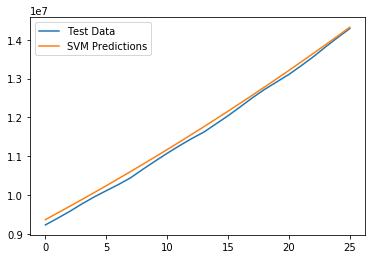

In [48]:
svm_reg = SVR(C=0.1,kernel='poly',gamma=0.01, epsilon=1)
svm_reg.fit(X_train_confirmed, y_train_confirmed)

svm_pred = svm_reg.predict(numbers_start_to_futures[50:])

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MSE of ", svm_reg.__class__.__name__, round(mse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

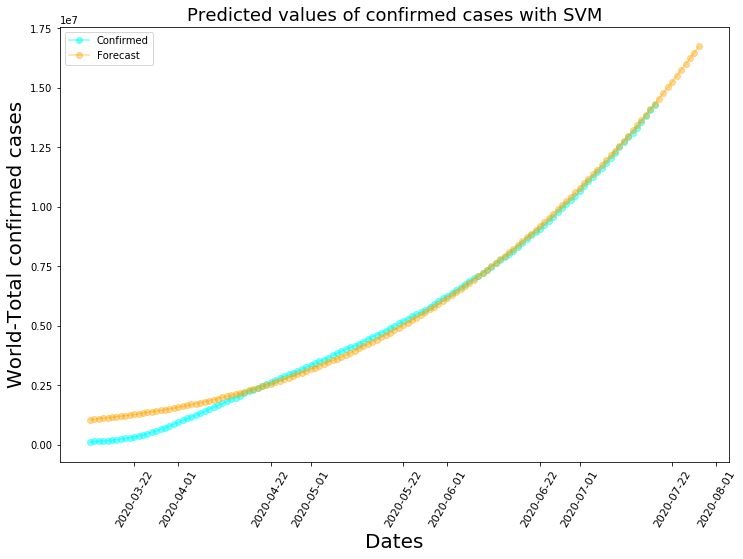

In [49]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with SVM" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= svm_pred,x= dates_start_to_futures[50:],label = 'Forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

#### Polynomial regression

coef:  [ 8.27685578e+06 -4.42274549e+05  7.86218725e+03 -5.27447893e+01
  1.34306492e-01]
RMSE of  LinearRegression 839660.24
MSE of  LinearRegression 705029320948.83
MAE of  LinearRegression 678730.37 



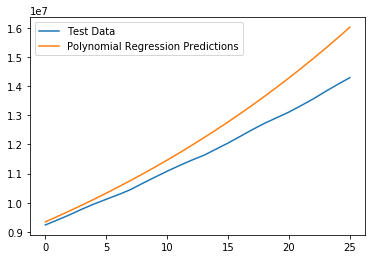

In [50]:
# transform the training data

poly_features=PolynomialFeatures(degree=4)

poly_X_train_confirmed = poly_features.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly_features.fit_transform(X_test_confirmed)
poly_future_forecast = poly_features.fit_transform(numbers_start_to_futures[50:])

# fit a Linear Regression model
lin_reg=LinearRegression(normalize=True, fit_intercept=False)

lin_reg.fit(poly_X_train_confirmed,y_train_confirmed)
coef=lin_reg.coef_
print("coef: ", coef)

y_pred = lin_reg.predict(poly_X_test_confirmed)

poly_pred = lin_reg.predict(poly_future_forecast)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", lin_reg.__class__.__name__, round(rmse,2))
print("MSE of ", lin_reg.__class__.__name__, round(mse,2))
print("MAE of ", lin_reg.__class__.__name__, round(mae,2), '\n')

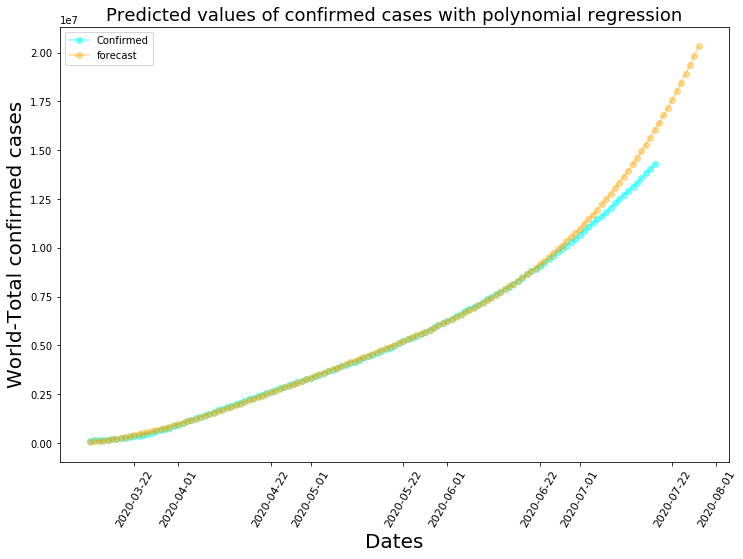

In [51]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with polynomial regression" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= poly_pred,x= dates_start_to_futures[50:],label = 'forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

#### Random Forests Regressor

RMSE of  RandomForestRegressor 3022310.15
MSE of  RandomForestRegressor 9134358633697.46
MAE of  RandomForestRegressor 2618035.03 



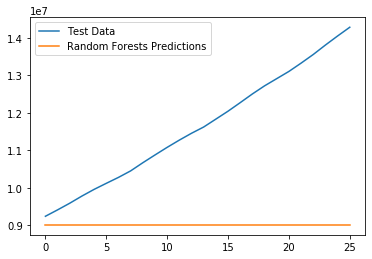

In [52]:
rf_reg = RandomForestRegressor(max_depth=7,n_estimators=50, random_state=42)

rf_reg.fit(X_train_confirmed, y_train_confirmed)

rf_pred = rf_reg.predict(numbers_start_to_futures[50:])

y_pred = rf_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Random Forests Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", rf_reg.__class__.__name__, round(rmse,2))
print("MSE of ", rf_reg.__class__.__name__, round(mse,2))
print("MAE of ", rf_reg.__class__.__name__, round(mae,2), '\n')

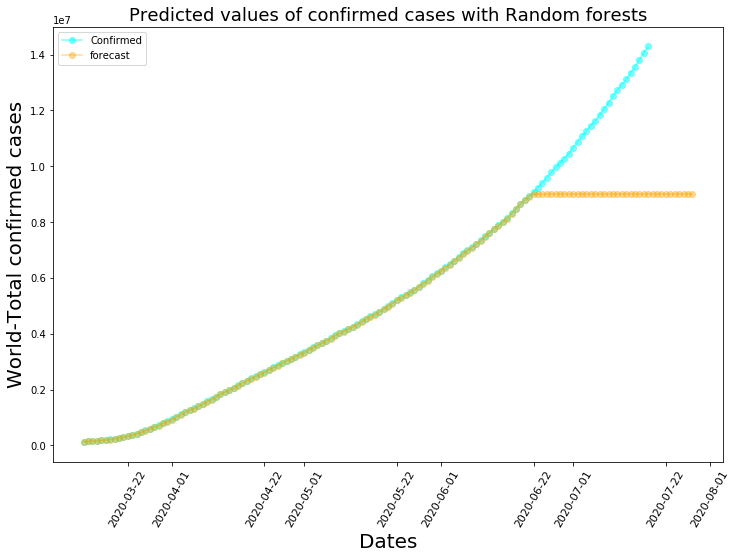

In [53]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with Random forests" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= rf_pred,x= dates_start_to_futures[50:],label = 'forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

#### XGBoost Regressor

In [54]:
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_reg.fit(X_train_confirmed, y_train_confirmed, early_stopping_rounds=10,
            eval_set=[(X_test_confirmed, y_test_confirmed)],verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

RMSE of  XGBRegressor 2965496.86
MSE of  XGBRegressor 8794171606725.69
MAE of  XGBRegressor 2552238.31 



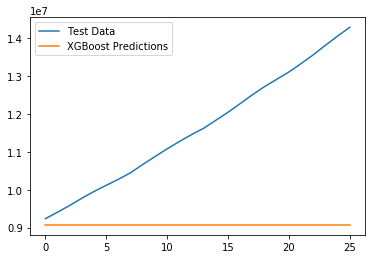

In [55]:
xgb_reg=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

xgb_reg.fit(X_train_confirmed, y_train_confirmed)

xgb_pred = xgb_reg.predict(numbers_start_to_futures[50:])

y_pred = xgb_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'XGBoost Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", xgb_reg.__class__.__name__, round(rmse,2))
print("MSE of ", xgb_reg.__class__.__name__, round(mse,2))
print("MAE of ", xgb_reg.__class__.__name__, round(mae,2), '\n')

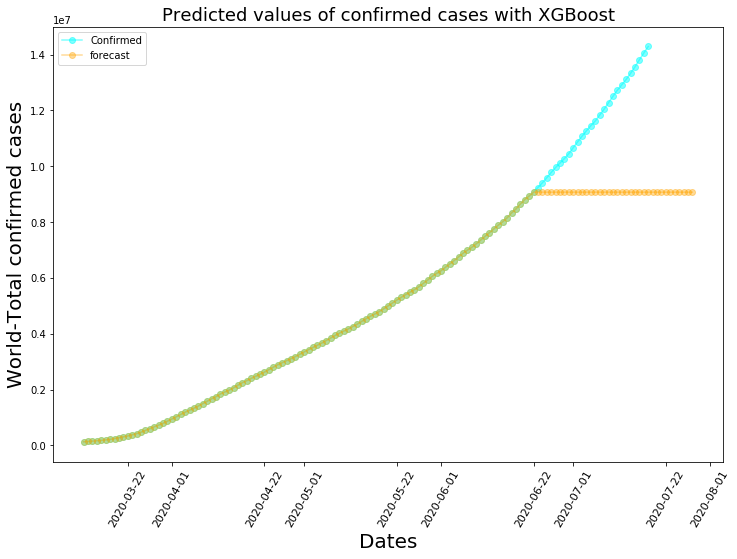

In [56]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with XGBoost" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= xgb_pred,x= dates_start_to_futures[50:],label = 'forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

#### ARIMA for prediction

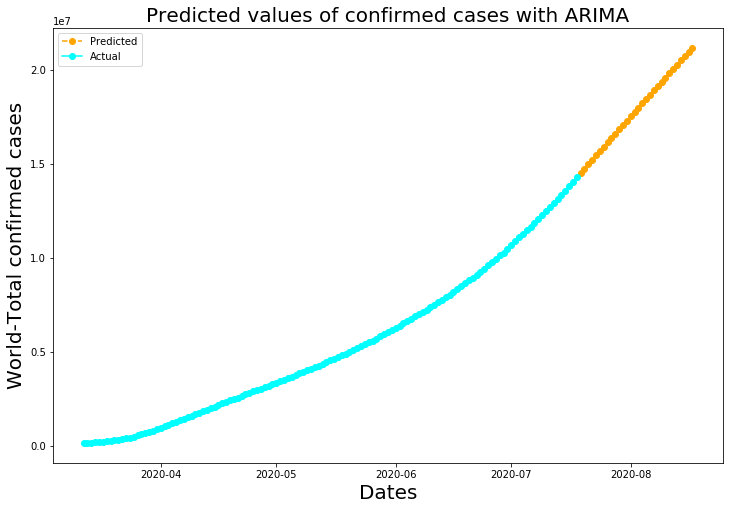

In [57]:
data = pd.DataFrame(columns = ['Date','y'])
data['Date'] = covid19_world['Date'][50:]
data['y'] = covid19_world['Confirmed'][50:].values

arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['Date'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (12,8))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with ARIMA" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'orange',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['Date'],linestyle = '-',color = 'cyan',label = 'Actual');
plt.legend();

#### Prophet Model for prediction
Note: I could not run these part of cells in my PC, because I had some problems with installation of `fbprophet` on Windows 10. So, I run it in kaggle notebook and then put its image as the output of this cell.

In [ ]:
# data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = covid19_world['Date'][50:]
data['y'] = covid19_world['Confirmed'][50:].values

prop=Prophet()
prop.fit(data)
future=prop.make_future_dataframe(periods=30)
prop_forecast=prop.predict(future)
forecast = prop_forecast[['ds','yhat']].tail(30)

fig = plot_plotly(prop, prop_forecast)
fig = prop.plot(prop_forecast,xlabel='Date',ylabel='World-Total confirmed cases')

![Prediction with Prophet](./data/prophet-1.png)

### Prediction of total death cases of the world

In [59]:
#Splitting the dataset related to death cases of the world into training and test sets

X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(numbers_of_dates[50:],
                                                                                covid19_world['Deaths'][50:].values,
                                                                                test_size = 0.2, shuffle=False)

print(X_train_death.shape)
print(y_train_death.shape)
print(X_test_death.shape)
print(y_test_death.shape)

(103, 1)
(103,)
(26, 1)
(26,)


#### Support vector machine regressor

RMSE of  SVR 141533.74
MSE of  SVR 20031799325.16
MAE of  SVR 133919.35 



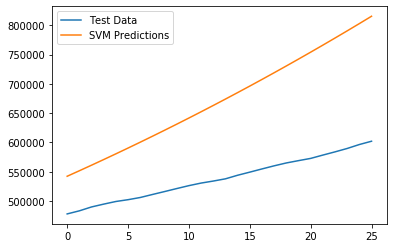

In [60]:
svm_reg = SVR(C=0.01,kernel='poly',gamma=0.01)
svm_reg.fit(X_train_death, y_train_death)

svm_pred = svm_reg.predict(numbers_start_to_futures[50:])

y_pred = svm_reg.predict(X_test_death)

plt.plot(y_test_death)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_death)
mse=mean_squared_error(y_pred, y_test_death)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MSE of ", svm_reg.__class__.__name__, round(mse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

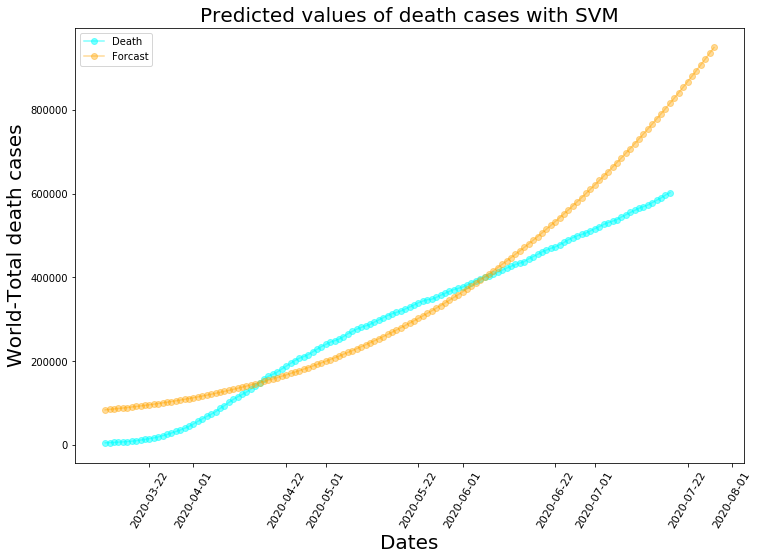

In [61]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total death cases',fontsize = 20)
plt.title("Predicted values of death cases with SVM" , fontsize = 20)

plt.plot_date(y= world_df['Deaths'].values, x= dates, label = 'Death',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= svm_pred,x= dates_start_to_futures[50:],label = 'Forcast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

#### Polynomial regression

coef:  [ 2.27459788e+06 -1.17473788e+05  2.21218262e+03 -1.88882828e+01
  7.66728091e-02 -1.18921663e-04]
RMSE of  LinearRegression 27374.69
MSE of  LinearRegression 749373778.1
MAE of  LinearRegression 22992.79 



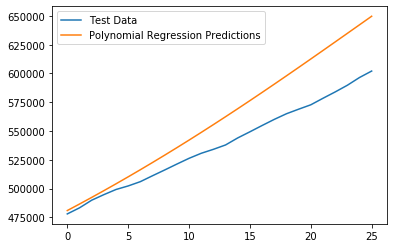

In [62]:
# transform the training data

poly_features=PolynomialFeatures(degree=5)

poly_X_train_death = poly_features.fit_transform(X_train_death)
poly_X_test_death = poly_features.fit_transform(X_test_death)
poly_future_forecast = poly_features.fit_transform(numbers_start_to_futures[50:])

# fit a Linear Regression model
lin_reg=LinearRegression(normalize=True, fit_intercept=False)

lin_reg.fit(poly_X_train_death,y_train_death)
coef=lin_reg.coef_
print("coef: ", coef)

y_pred = lin_reg.predict(poly_X_test_death)

poly_pred = lin_reg.predict(poly_future_forecast)

plt.plot(y_test_death)
plt.plot(y_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

mae=mean_absolute_error(y_pred, y_test_death)
mse=mean_squared_error(y_pred, y_test_death)
rmse = np.sqrt(mse)
print("RMSE of ", lin_reg.__class__.__name__, round(rmse,2))
print("MSE of ", lin_reg.__class__.__name__, round(mse,2))
print("MAE of ", lin_reg.__class__.__name__, round(mae,2), '\n')

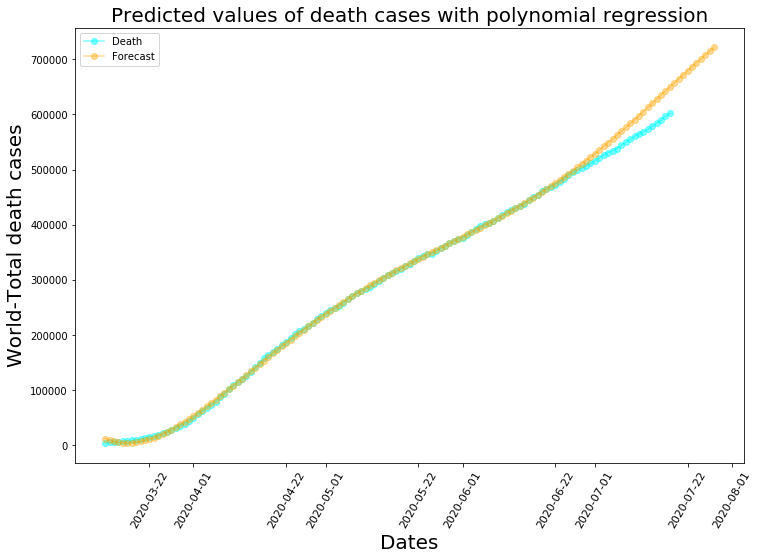

In [63]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total death cases',fontsize = 20)
plt.title("Predicted values of death cases with polynomial regression" , fontsize = 20)

plt.plot_date(y= world_df['Deaths'].values, x= dates, label = 'Death',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= poly_pred,x= dates_start_to_futures[50:],label = 'Forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

#### ARIMA for prediction

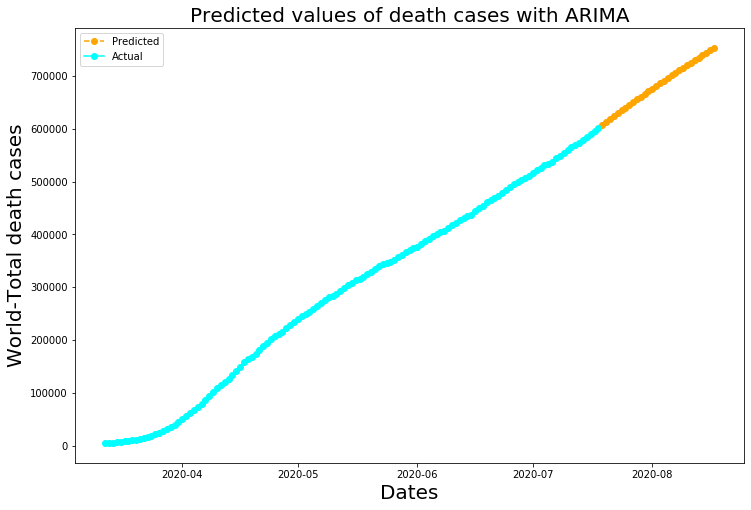

In [64]:
data = pd.DataFrame(columns = ['Date','y'])
data['Date'] = covid19_world['Date'][50:]
data['y'] = covid19_world['Deaths'][50:].values

arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['Date'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (12,8))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total death cases',fontsize = 20)
plt.title("Predicted values of death cases with ARIMA" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'orange',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['Date'],linestyle = '-',color = 'cyan',label = 'Actual');
plt.legend();

#### Prophet Model for prediction

In [ ]:
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = covid19_world['Date'][50:]
data['y'] = covid19_world['Deaths'][50:].values

prop=Prophet()
prop.fit(data)
future=prop.make_future_dataframe(periods=30)
prop_forecast=prop.predict(future)
forecast = prop_forecast[['ds','yhat']].tail(30)

fig = plot_plotly(prop, prop_forecast)
fig = prop.plot(prop_forecast,xlabel='Date',ylabel='World-Total death cases')

![Prediction with Prophet](./data/prophet-2.png)

### Prediction of confirmed cases of 5 most affected countries and Iran

#### ARIMA for prediction

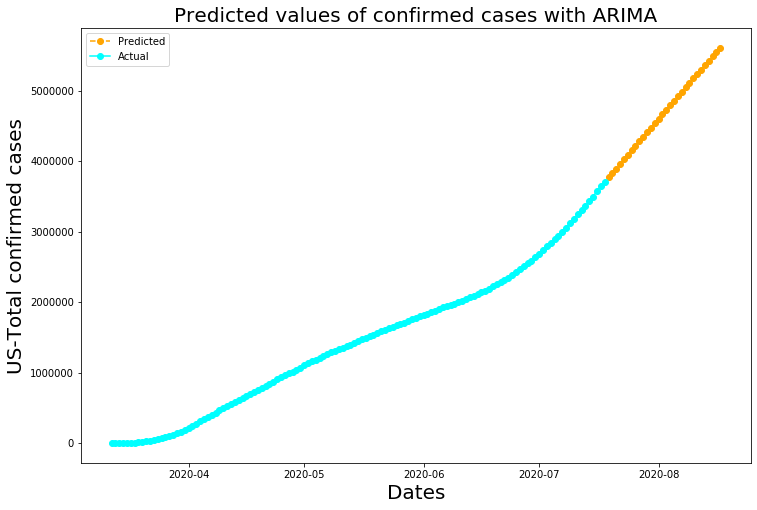

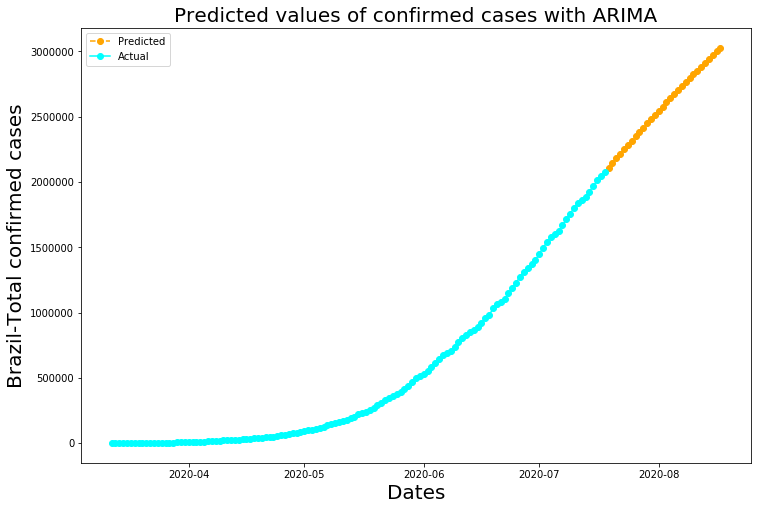

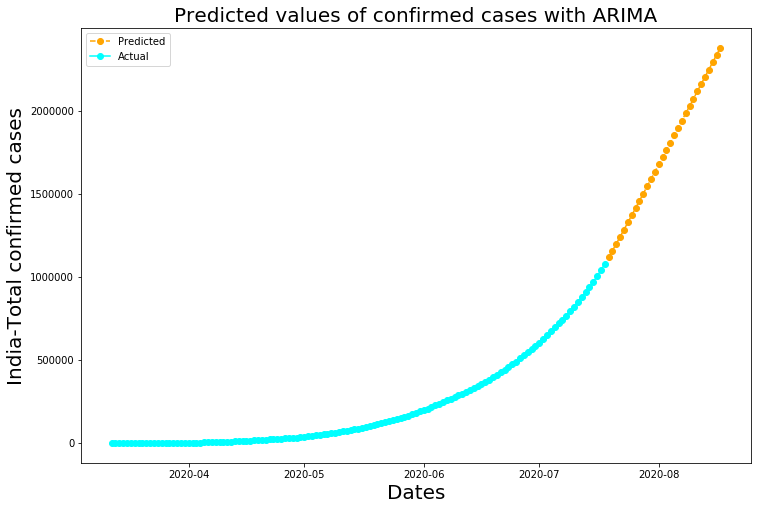

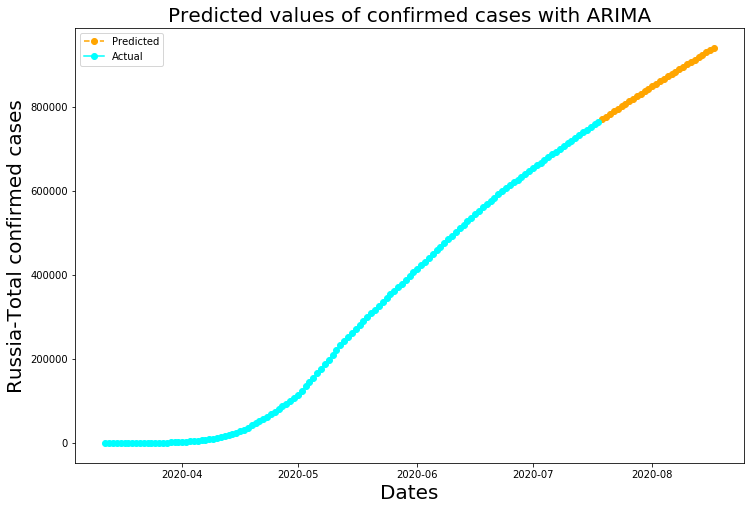

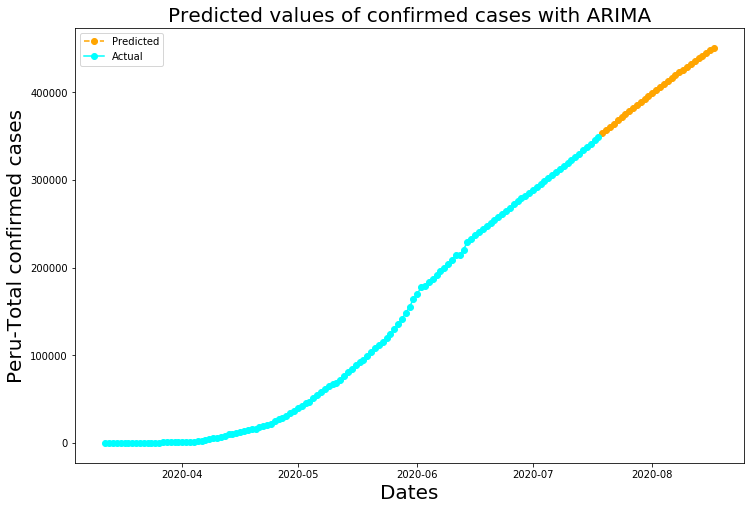

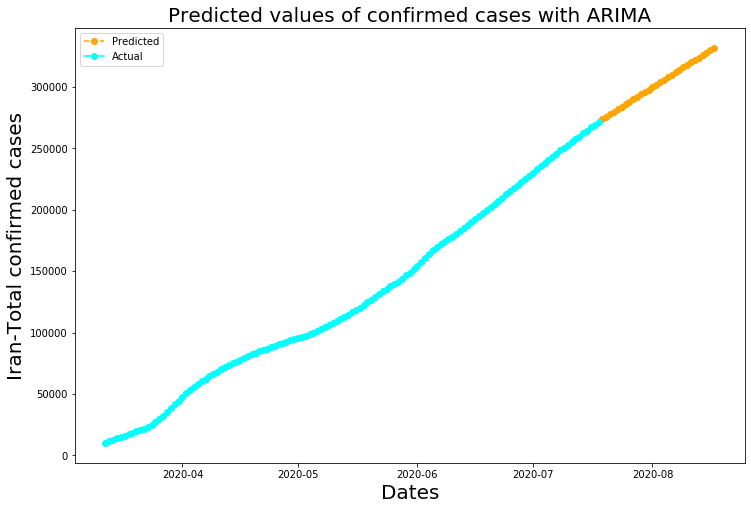

In [66]:
most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['Date','y'])
    data['Date'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Confirmed'].values

    arima = ARIMA(data['y'], order=(5, 1, 0))
    arima = arima.fit(trend='c', full_output=True, disp=True)
    forecast = arima.forecast(steps= 30)
    pred = list(forecast[0])

    start_date = data['Date'].max()
    prediction_dates = []
    for i in range(30):
        date = start_date + timedelta(days=1)
        prediction_dates.append(date)
        start_date = date
    plt.figure(figsize= (12,8))
    plt.xlabel("Dates",fontsize = 20)
    plt.ylabel('%s-Total confirmed cases' %(j),fontsize = 20)
    plt.title("Predicted values of confirmed cases with ARIMA" , fontsize = 20)

    plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'orange',label = 'Predicted');
    plt.plot_date(y=data['y'],x=data['Date'],linestyle = '-',color = 'cyan',label = 'Actual');
    plt.legend();
    k=k+1

#### Prophet Model for prediction

In [ ]:
most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['ds','y'])
    data['ds'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Confirmed'].values

    prop=Prophet()
    prop.fit(data)
    future=prop.make_future_dataframe(periods=30)
    prop_forecast=prop.predict(future)
    forecast = prop_forecast[['ds','yhat']].tail(30)

    fig = plot_plotly(prop, prop_forecast)
    fig = prop.plot(prop_forecast,xlabel='Date',ylabel='%s-Total confirmed cases' %(j))
    k=k+1

![Prediction with Prophet](./data/prophet-3.png)

![Prediction with Prophet](./data/prophet-4.png)

![Prediction with Prophet](./data/prophet-5.png)

![Prediction with Prophet](./data/prophet-6.png)

![Prediction with Prophet](./data/prophet-7.png)

![Prediction with Prophet](./data/prophet-8.png)

### Prediction of death cases of 5 most affected countries and Iran

#### ARIMA for prediction

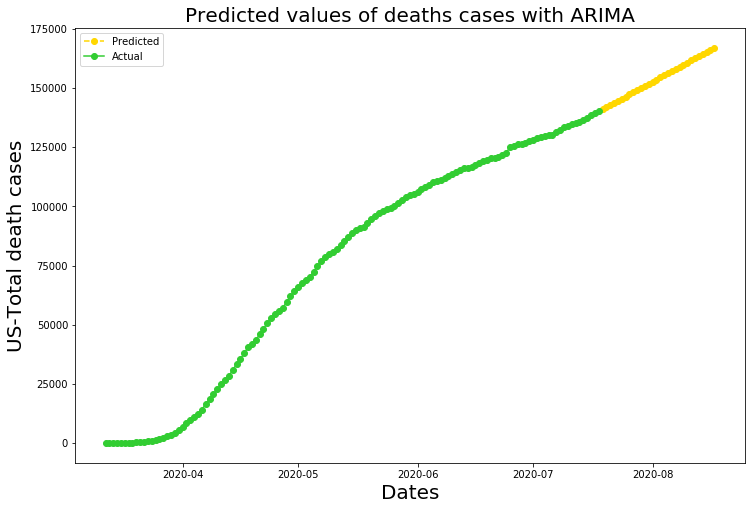

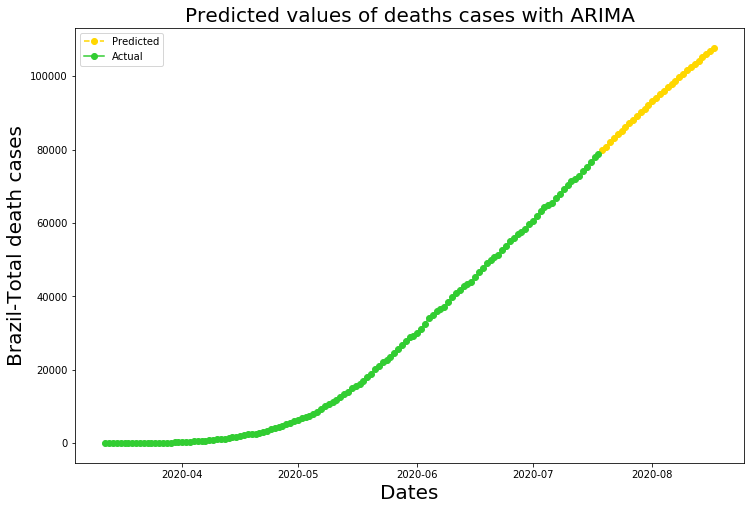

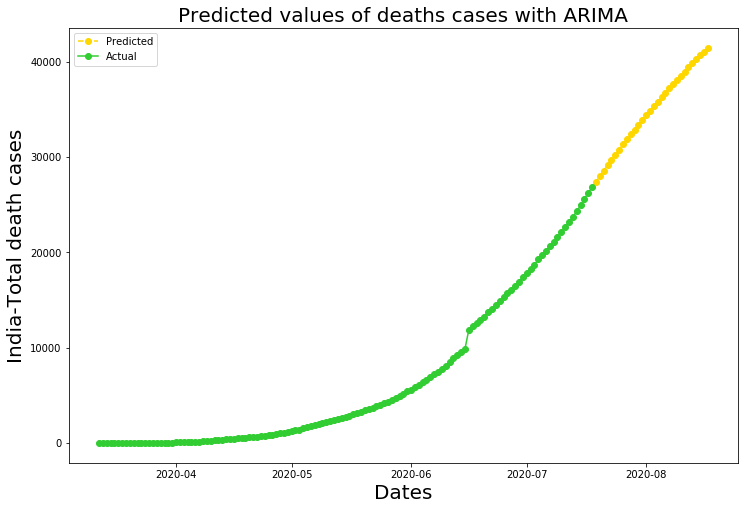

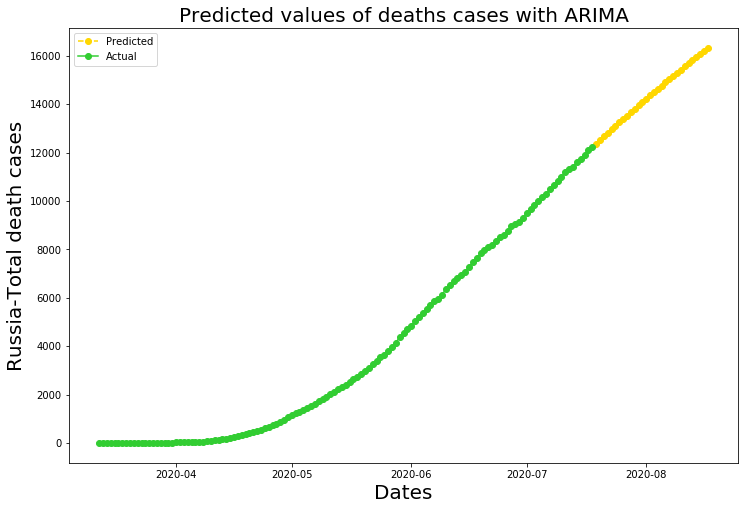

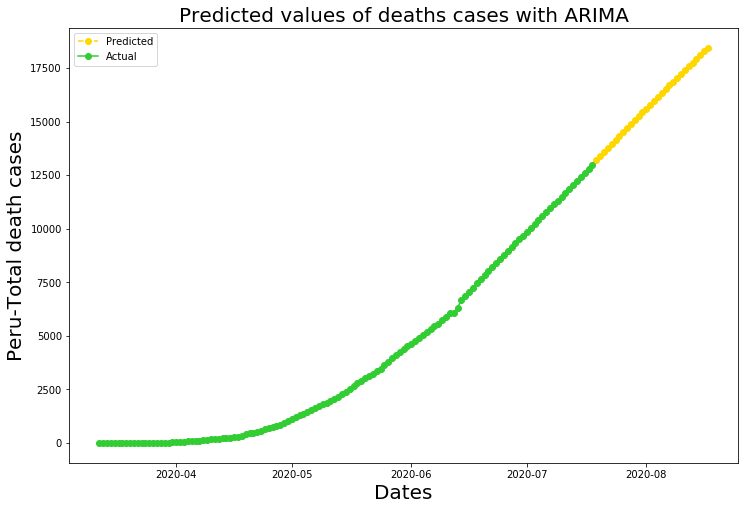

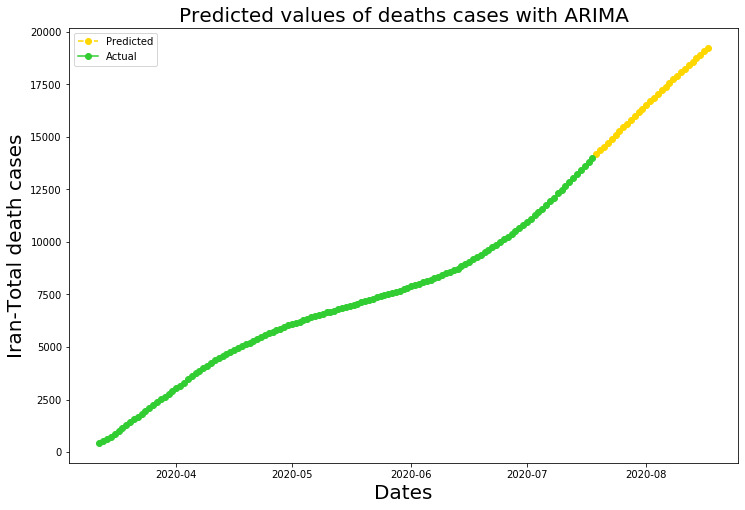

In [69]:
most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['Date','y'])
    data['Date'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Deaths'].values

    arima = ARIMA(data['y'], order=(5, 1, 0))
    arima = arima.fit(trend='c', full_output=True, disp=True)
    forecast = arima.forecast(steps= 30)
    pred = list(forecast[0])

    start_date = data['Date'].max()
    prediction_dates = []
    for i in range(30):
        date = start_date + timedelta(days=1)
        prediction_dates.append(date)
        start_date = date
    plt.figure(figsize= (12,8))
    plt.xlabel("Dates",fontsize = 20)
    plt.ylabel('%s-Total death cases' %(j),fontsize = 20)
    plt.title("Predicted values of deaths cases with ARIMA" , fontsize = 20)

    plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'gold',label = 'Predicted');
    plt.plot_date(y=data['y'],x=data['Date'],linestyle = '-',color = 'limegreen',label = 'Actual');
    plt.legend();
    k=k+1

#### Prophet Model for prediction

In [ ]:
most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['ds','y'])
    data['ds'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Deaths'].values

    prop=Prophet()
    prop.fit(data)
    future=prop.make_future_dataframe(periods=30)
    prop_forecast=prop.predict(future)
    forecast = prop_forecast[['ds','yhat']].tail(30)

    fig = plot_plotly(prop, prop_forecast)
    fig = prop.plot(prop_forecast,xlabel='Date',ylabel='%s-Total deaths cases' %(j))
    k=k+1

![Prediction with Prophet](./data/d-prophet-3.png)

![Prediction with Prophet](./data/d-prophet-4.png)

![Prediction with Prophet](./data/d-prophet-5.png)

![Prediction with Prophet](./data/d-prophet-6.png)

![Prediction with Prophet](./data/d-prophet-7.png)

![Prediction with Prophet](./data/d-prophet-8.png)